

# EDA Walkthrough



In [2]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Load the data

---

Import the `Heart.csv` file into a pandas DataFrame.

In [3]:
heart = pd.read_csv('data/Heart.csv')

## Describe the basic format of the data and the columns

---

Use the `.head()` method (and optionally pass in an integer for the number of rows you want to see) to get a glimpse of your dataset. This is a good initial step to get a feel for what is in the CSV and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [4]:
# Print out the first 8 rows:
heart.iloc[:8, :]

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,0
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,1
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,0


In [5]:
heart.head(8)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,0
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,1
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,0


In [6]:
# Look at the dtypes of the columns:
heart.dtypes

Unnamed: 0      int64
Age            object
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD             int64
dtype: object

## Drop unwanted columns

---



In [3]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:


In [7]:
# Remove the unneccesary column:
heart = pd.read_csv('data/Heart.csv', index_col=0)

In [8]:
heart.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Unnamed: 0,,,,,,,,,,,,,,
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1


In [10]:
#what is going on with Age?
col = heart.Age
for age in col:
    try:
        int(age)
    except:
        print(age)

?
?
?
?
?
?
?
?
?


In [11]:
def age_converter(age):
    try:
        return int(age)
    except:
        return np.nan

In [16]:
heart.Age = heart.Age.apply(age_converter)

In [17]:
# replace ? with np.nan
#heart.Age.replace(to_replace='?', value = np.nan)

In [21]:
# how many values are missing?
# heart.info()
heart.isnull().sum()

Age          9
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [23]:
# drop null values
heart.dropna(inplace = True)

In [24]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 1 to 302
Data columns (total 14 columns):
Age          288 non-null float64
Sex          288 non-null int64
ChestPain    288 non-null object
RestBP       288 non-null int64
Chol         288 non-null int64
Fbs          288 non-null int64
RestECG      288 non-null int64
MaxHR        288 non-null int64
ExAng        288 non-null int64
Oldpeak      288 non-null float64
Slope        288 non-null int64
Ca           288 non-null float64
Thal         288 non-null object
AHD          288 non-null int64
dtypes: float64(3), int64(9), object(2)
memory usage: 33.8+ KB


In [27]:
heart.head(1)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Unnamed: 0,,,,,,,,,,,,,,
1,63.0,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0


In [31]:
heart = pd.read_csv('data/Heart.csv')
heart = heart.drop('Unnamed: 0', axis = 1)
heart.Age = heart.Age.apply(age_converter)

In [32]:
# rename columns
new_columns_list = [
    'age',
    'sex_male',
    'chest_pain',
    'resting_blood_pressure',
    'cholesterol',
    'fasting_blood_sugar',
    'resting_ecg',
    'max_heart_rate',
    'exercise_induced_angina',
    'old_peak',
    'slope',
    'ca',
    'thallium_stress_test',
    'has_heart_disease',
]

heart.columns = new_columns_list

In [33]:
# examine distributions of columns; any abnormalities?
heart.describe()

,age,sex_male,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,has_heart_disease
count,294.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.357143,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,9.124004,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [34]:
titanic = sns.load_dataset('titanic')

In [35]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [38]:
pd.get_dummies(titanic, columns = ['sex'], drop_first=True)

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


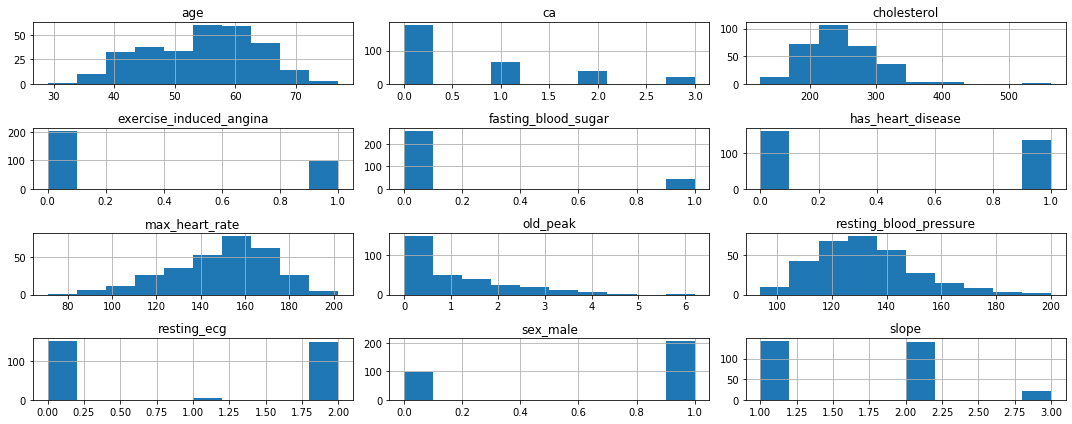

In [41]:
heart.hist(figsize = (15, 6));
plt.tight_layout()

In [42]:
heart.head(2)

,age,sex_male,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,thallium_stress_test,has_heart_disease
0,63.0,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67.0,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1


In [43]:
# examine groups
heart.groupby('chest_pain')['max_heart_rate'].mean()

chest_pain
asymptomatic    140.680556
nonanginal      155.406977
nontypical      162.420000
typical         155.956522
Name: max_heart_rate, dtype: float64

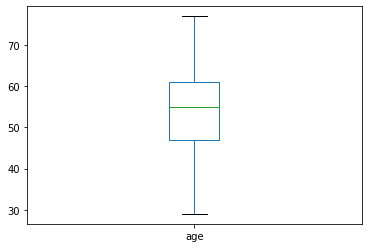

In [44]:
# plotting age; a
heart.age.plot(kind = 'box')

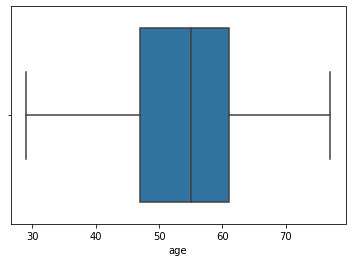

In [45]:
# plotting age; b
sns.boxplot('age', data = heart)

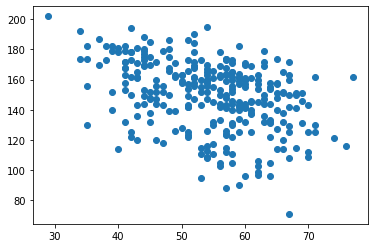

In [46]:
# max heart rate
plt.scatter(heart.age, heart.max_heart_rate)

In [47]:
# correlation matrix
heart.corr()

,age,sex_male,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,has_heart_disease
age,1.000000,-0.099631,0.285981,0.206575,0.116492,0.149542,-0.399058,0.100354,0.200340,0.164051,0.358951,0.228794
sex_male,-0.099631,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.276816
resting_blood_pressure,0.285981,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.150825
cholesterol,0.206575,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.085164
fasting_blood_sugar,0.116492,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.025264
resting_ecg,0.149542,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.169202
max_heart_rate,-0.399058,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.417167
exercise_induced_angina,0.100354,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.431894
old_peak,0.200340,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.424510
slope,0.164051,0.037533,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.110119,0.339213


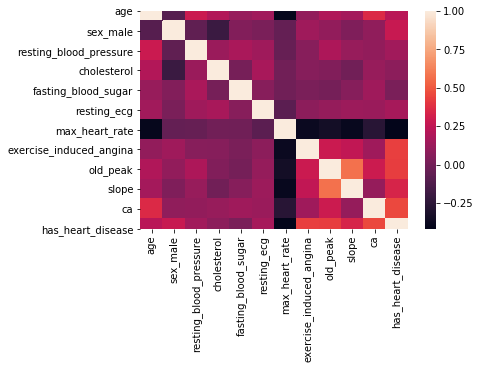

In [48]:
# visualize
sns.heatmap(heart.corr())

In [51]:
heart2 = pd.read_csv('data/Heart.csv')
heart2['Age'] = heart2.Age.apply(age_converter)

In [52]:
heart2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
Age           294 non-null float64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            299 non-null float64
Thal          301 non-null object
AHD           303 non-null int64
dtypes: float64(3), int64(10), object(2)
memory usage: 35.6+ KB
